# About

- Use Langchain to create a summary of an youtube video (in english)
- Use [Falcon](https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2) (fully open source chat model)

# Installs & Imports

In [ ]:
%%time
! pip install -qq -U transformers
! pip install -qq -U langchain youtube_transcript_api einops
! pip install -qq -U accelerate bitsandbytes xformers

CPU times: user 347 ms, sys: 33.3 ms, total: 381 ms
Wall time: 34.8 s


In [ ]:
from IPython.display import YouTubeVideo

from langchain.document_loaders import YoutubeLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import LLMChain
from langchain.chains.summarize import load_summarize_chain
from langchain.llms import HuggingFacePipeline
from langchain.llms import TextGen

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

import torch

import langchain
print(langchain.__version__)

0.0.227


# Put your endpoint api url here 👇


In [ ]:
endpoint = "https://raising-df-zoning-proteins.trycloudflare.com"

# Run for ooba

In [ ]:
llm = (model_url=endpoint)

# Test your LLM instance

In [ ]:
llm("""
Question: What is the sum of 2 + 2?
Answer:
""")

4


'4'

# Video

- Provide the ID of the video
- Just visualize the video in the notebook

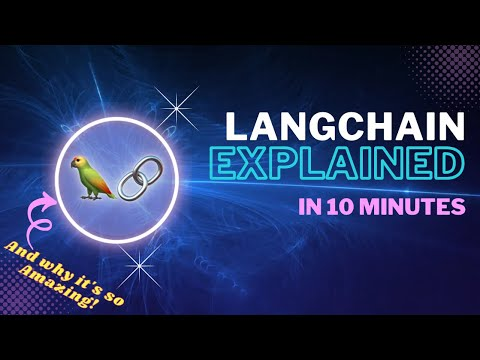

In [ ]:
YouTubeVideo('Y_O-x-itHaU', width=700, height=500)

# Load video

With Langchain

In [ ]:
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=Y_O-x-itHaU")
transcript = loader.load()

In [ ]:
transcript

[Document(page_content="land chain is one of the hottest AI Frameworks right now with over 40 000 stars on GitHub as of this video let me help you understand some of the most important aspects of Lang chain and why it's such an amazing library to work with most of us have used chat GPT and are quite fascinated by its capabilities so you can add something like write in this style of Shakespeare how to cook pasta so what happens behind the scenes is that it takes your input and sends it to an AI system as a prompt and that generates a response which is provided back to you and often these systems are called large language models which are trained on a huge amount of text Data from the internet now I want you to imagine a scenario where you are an instructor and you want your students to use chat GPT and submit all of their assignments in the written style of Shakespeare so you can imagine that most of our students are prompting chat GPT to write in this style of Shakespeare and this is q

# Splitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=50)
texts = text_splitter.split_documents(transcript)

In [ ]:
len(texts)

4

# Model

# Summarize chain

There are three options for chain_type:
- "stuff"
- "map_reduce"
- "refine"

## Default prompt template

In [ ]:
chain = load_summarize_chain(llm=llm, chain_type="map_reduce", verbose=True)

In [ ]:
chain

MapReduceDocumentsChain(memory=None, callbacks=None, callback_manager=None, verbose=True, input_key='input_documents', output_key='output_text', llm_chain=LLMChain(memory=None, callbacks=None, callback_manager=None, verbose=True, prompt=PromptTemplate(input_variables=['text'], output_parser=None, partial_variables={}, template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:', template_format='f-string', validate_template=True), llm=HuggingFacePipeline(cache=None, verbose=False, callbacks=None, callback_manager=None, pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7d472d493bb0>, model_id='gpt2', model_kwargs=None, pipeline_kwargs=None), output_key='text'), combine_document_chain=StuffDocumentsChain(memory=None, callbacks=None, callback_manager=None, verbose=True, input_key='input_documents', output_key='output_text', llm_chain=LLMChain(memory=None, callbacks=None, callback_manager=None, verbose=True, prompt=PromptTemplat

In [ ]:
### default prompt template
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [ ]:
%%time

# Run the chain with verbose=True
summary = chain.run(texts)
summary



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"land chain is one of the hottest AI Frameworks right now with over 40 000 stars on GitHub as of this video let me help you understand some of the most important aspects of Lang chain and why it's such an amazing library to work with most of us have used chat GPT and are quite fascinated by its capabilities so you can add something like write in this style of Shakespeare how to cook pasta so what happens behind the scenes is that it takes your input and sends it to an AI system as a prompt and that generates a response which is provided back to you and often these systems are called large language models which are trained on a huge amount of text Data from the internet now I want you to imagine a scenario where you are an instructor and you want your students to use chat GPT and submit all of their assignments in the written style of 



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"

Lang Chain is a popular AI framework that allows developers to create chat-style GPT models. It is based on the idea of combining user input with a base prompt to generate a response. Prompt templates allow developers to provide specific instructions to the LLM, such as being helpful or an expert in the area. The application is working well, but the developers want to add the ability to call any of the available LLMs. Lang Chain makes this easy by allowing developers to swap out any of the LLMs listed under the model section.



1. Under the model section, you may have noticed that there are a few steps happening here where we take the prompt template and provide the user input to it, and then specify the LM before we make a call to the LLM for the response.

2. Question Answering Chains (QAC) have a special place in the Link Chain Lib

'\n\nLang Chain is a popular AI framework that allows developers to create chat-style GPT models. It is based on the idea of combining user input with a base prompt to generate a response. Prompt templates allow developers to provide specific instructions to the LLM, such as being helpful or an expert in the area. The application is working well, but the developers want to add the ability to call any of the available LLMs. Lang Chain makes this easy by allowing developers to swap out any of the LLMs listed under the model section.\n\nQuestion Answering Chains (QAC) have a special place in the Link Chain Library, so I would like to expand on this a little more. If students were to copy the text from these books and paste it into ChatGPT, most likely they would get an error like this: "It was too long for ChatGPT to process and give an answer." The way we can overcome this is by using Lang Chain in Lang Chain, the typical Q&A process starts with first loading the document with something 

In [ ]:
len(summary)

2490

## Custom prompt template

In [ ]:
chain2 = load_summarize_chain(llm=llm, chain_type="map_reduce", verbose=False)

In [ ]:
### change the prompt template
chain2.llm_chain.prompt.template = \
"""Write a three paragraph summary the following:


"{text}"


3 PARAGRAPH SUMMARY:"""

In [ ]:
%%time

# Run the chain  with verbose=False
summary = chain2.run(texts)
summary

CPU times: user 34min 31s, sys: 3.54 s, total: 34min 34s
Wall time: 34min 40s


'\n\nLang Chain is a popular AI framework that allows developers to create advanced chatbots and language models. It uses a technique called prompt templates, which allow users to combine user input with a base prompt to generate responses from the LLM. This technique can be used to create a Shakespeare-style writing app that combines user input with a base prompt to generate responses in the style of Shakespeare.\n\nUnder the model section, you may have noticed that there are a few steps happening here where we take the prompt template and provide the user input to it, and then specify the LLM before we make a call to the LLM for the response. There are many different types of chains available in Lang chain, and these chains are often named after the tasks they perform in our earlier example. We wanted to call an LLM the chain for that is LLM chain if we would like to perform math problems, the chain for that is called Math LLM chain and if we were to perform SQL operations, the chain

In [ ]:
len(summary)
print(summary)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'summary' is not defined